# Fourier Lens

This notebook contains the problems which are solved with the Diffraction Tool

## Import all the things

Import regular packages

In [3]:
%matplotlib inline

import cv2
import numpy as np
from cmath import pi

Add relative path

In [4]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [5]:
from DiffractionTool import RaySomSolver
from DiffractionTool import PhaseModulator 
from DiffractionTool import HelperFunctions as hp

## Problems

As shown in the figure above, a 632.8nm laser beam is incident on a 200 micron diameter phase type hologram
The transmitted light forms an image of 500 μm *500 μm at z=400 μm (the image content is customized).
Combined with angular spectrum method or Rayleigh-Sommerfeld diffraction, the GS algorithm was independently built to optimize the following two methods
The hologram phase distribution in case. Upload code and report (includes phase distribution and detailed analysis knots
Fruit))
1. Phase distribution when the pixel cell size of the hologram is 0.3μm*0.3μm
2. Phase distribution when the pixel cell size of the hologram is 2μm*2μm
3. Compare the differences between the two cases and analyze the reasons

<img src="https://github.com/yesunhuang/Optics_Toolbox_In_Python/blob/d03ce783648cac68aa20def4973a9ee44055fc0f/notebooks/imgs/Prob3.png" width="50%">

<img src="imgs/Prob3.png" width="50%">

#### Paramters

In [4]:
N_size=2001
#μm plane [400,400]μm 
interval=0.2
waveLambda=0.633
k=2.0*pi/waveLambda
actualSize=N_size*interval
xyInterval=[interval]*2

#### Original Image

In [5]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")
filename='Prob3Data.png'

In [6]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
imgActualSize=40
imgNSize=grayImg.shape[0]
grayImg=np.where(grayImg>100,grayImg,0)

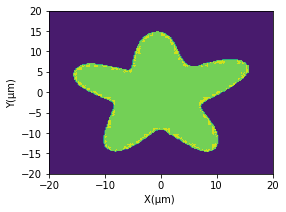

In [7]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

#### Pre-Modified Image

(4242, 4242)


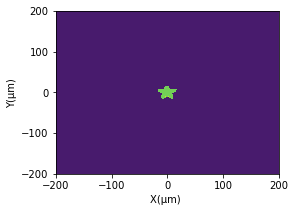

In [8]:
padSize=int((actualSize/(imgActualSize)*imgNSize-imgNSize)/2)
preImg=cv2.copyMakeBorder(grayImg,padSize,padSize,padSize,padSize,cv2.BORDER_CONSTANT,value=0)
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(preImg,labels,range)
print(preImg.shape)

(2001, 2001)


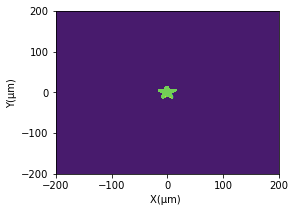

In [9]:
preImg=cv2.resize(preImg,(N_size,N_size))
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(preImg,labels,range)
print(preImg.shape)

#### Propagator of wavefront via Rayleigh-Sommerfeld method

In [10]:
propagator=RaySomSolver(N_size,xyInterval,k)

#### M=1

$z_1=z_2=2f=200\mu m$

In [11]:
z1=z2=200
f=100
r=210

U1

In [12]:
U0=np.sqrt(preImg)
U1=propagator.cal_wavefront(U0,z1)

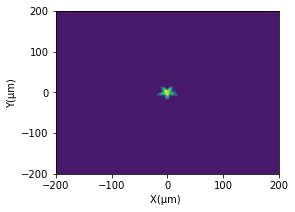

In [13]:
hp.displace_2d(hp.intensity(U1),labels,range)

U1'

In [14]:
lens=PhaseModulator()
lens.get_normal_lens_modulator(k,f,r)
U1_af=lens.apply_modulator(U1,N_size,xyInterval)

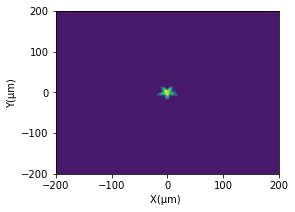

In [15]:
hp.displace_2d(hp.intensity(U1_af),labels,range)

Ui

In [16]:
Ui=propagator.cal_wavefront(U1_af,z2)

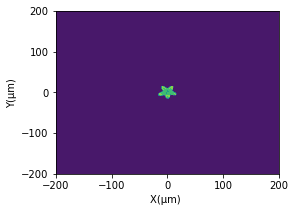

In [17]:
hp.displace_2d(hp.intensity(Ui),labels,range)

#### M=2

$$z_1=\frac{3}{2}f=150\mu m$$
$$z_2=2z_1=300\mu m$$

In [18]:
z1=150
z2=300
f=100
r=210

U1

In [19]:
U0=np.sqrt(preImg)
U1=propagator.cal_wavefront(U0,z1)

U1'

In [20]:
lens=PhaseModulator()
lens.get_normal_lens_modulator(k,f,r)
U1_af=lens.apply_modulator(U1,N_size,xyInterval)

Ui

In [21]:
Ui=propagator.cal_wavefront(U1_af,z2)

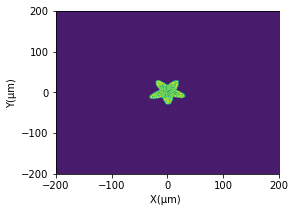

In [22]:
hp.displace_2d(hp.intensity(Ui),labels,range)

M=6

$$z_1=\frac{7}{6}f=233.33\mu m$$
$$z_2=2z_1=1400\mu m$$

In [28]:
f=100
r=210
z1=7.0*f/6.0
z2=6*z1

U1

In [29]:
U0=np.sqrt(preImg)
U1=propagator.cal_wavefront(U0,z1)

U1'

In [30]:
lens=PhaseModulator()
lens.get_normal_lens_modulator(k,f,r)
U1_af=lens.apply_modulator(U1,N_size,xyInterval)

Ui

In [31]:
Ui=propagator.cal_wavefront(U1_af,z2)

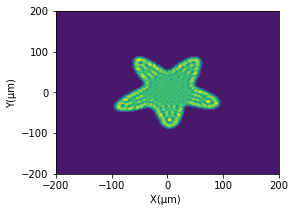

In [32]:
hp.displace_2d(hp.intensity(Ui),labels,range)